# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [ ]:
import os
import pathlib


if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models

In [ ]:
%%bash   
ls

In [ ]:
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py . 
python -m pip install .

In [1]:
import tensorflow as tf
import numpy as np
from utils import get_dataset

In [2]:
import logging
from object_detection.inputs import train_input
from object_detection.protos import input_reader_pb2
from object_detection.builders.dataset_builder import build as build_dataset
from object_detection.utils.config_util import get_configs_from_pipeline_file
from waymo_open_dataset import dataset_pb2 as open_dataset

In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as Patches
import matplotlib.image as mpimg
import cv2
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import glob

In [4]:
%%bash 
pwd

/opt/notebooks


In [187]:
dataset = get_dataset("/opt/notebooks/*tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['/opt/notebooks/*tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/opt/notebooks/*tfrecord']
INFO:tensorflow:Number of filenames to read: 97


In [188]:
dataset

<PrefetchDataset shapes: {image: (None, None, 3), source_id: (), key: (), filename: (), groundtruth_image_confidences: (None,), groundtruth_verified_neg_classes: (None,), groundtruth_not_exhaustive_classes: (None,), groundtruth_boxes: (None, 4), groundtruth_area: (None,), groundtruth_is_crowd: (None,), groundtruth_difficult: (None,), groundtruth_group_of: (None,), groundtruth_weights: (None,), groundtruth_classes: (None,), groundtruth_image_classes: (None,), original_image_spatial_shape: (2,)}, types: {image: tf.uint8, source_id: tf.string, key: tf.string, filename: tf.string, groundtruth_image_confidences: tf.float32, groundtruth_verified_neg_classes: tf.int64, groundtruth_not_exhaustive_classes: tf.int64, groundtruth_boxes: tf.float32, groundtruth_area: tf.float32, groundtruth_is_crowd: tf.bool, groundtruth_difficult: tf.int64, groundtruth_group_of: tf.bool, groundtruth_weights: tf.float32, groundtruth_classes: tf.int64, groundtruth_image_classes: tf.int64, original_image_spatial_sha

## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [189]:
def display_instances(batch):
        
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.

        
    """
    # Create figure and axes
    colors={1:'red',2:'green',4:'blue'}
    col = 1
    row = (10+1)
    i=0
    _, ax = plt.subplots(nrows=10, ncols=1,figsize=(80,80))
    #print(axs)
    for data, a in zip (batch,ax):

        #fig, axs = plt.subplots(2, 2)
        image = data['image'].numpy()
        Classes= data['groundtruth_classes'].numpy()
        Bbox=data['groundtruth_boxes'].numpy()
        width,height,depth=image.shape
        widthScale=width/1
        heigthScale=height/1

        a.imshow(image)
        for cl, box in zip (Classes,Bbox):
            y1,x1,y2,x2=box
            #print(y1,x1,y2,x2)
            x1=x1*widthScale
            x2=x2*widthScale
            y1=y1*heigthScale
            y2=y2*heigthScale
            #print(y1,x1,y2,x2)
            #print(cl)
            rec =Patches.Rectangle((x1,y1),x2-x1,y2-y1,edgecolor=colors[cl],facecolor ='none')
            a.add_patch(rec)     
plt.show() 

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

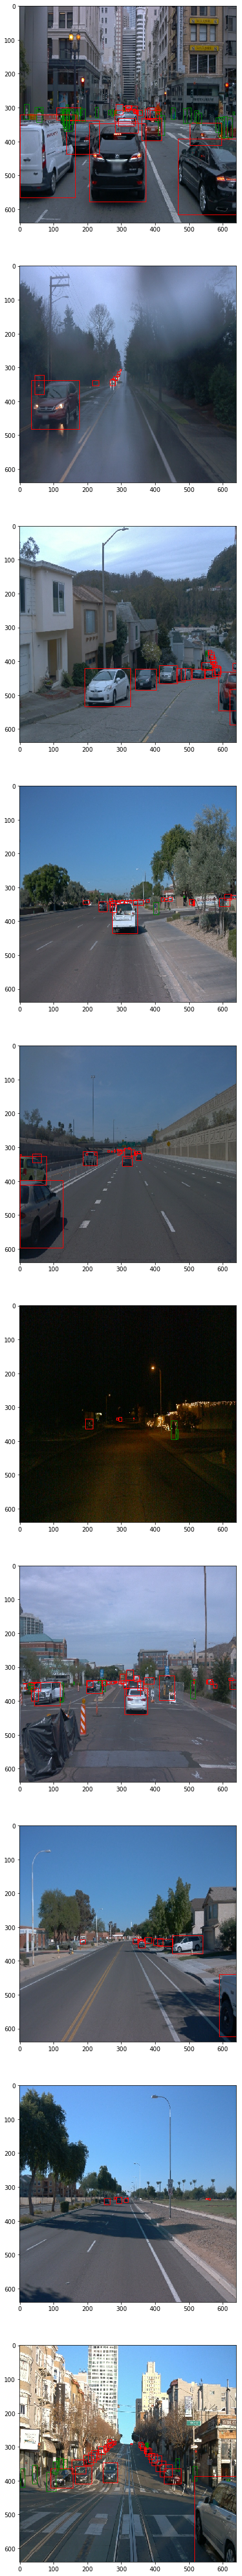

In [192]:
dataset = dataset.shuffle(97)
display_instances(dataset.take(10))

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

Read one tf file 

In [21]:
FILENAME ='segment-10017090168044687777_6380_000_6400_000_with_camera_labels.tfrecord'
files = os.listdir(path)
datasets = get_dataset(FILENAME)

import glob
files=glob.glob("/opt/notebooks/*tfrecord")

for file in files:
    print (file)

<PrefetchDataset shapes: {image: (None, None, 3), source_id: (), key: (), filename: (), groundtruth_image_confidences: (None,), groundtruth_verified_neg_classes: (None,), groundtruth_not_exhaustive_classes: (None,), groundtruth_boxes: (None, 4), groundtruth_area: (None,), groundtruth_is_crowd: (None,), groundtruth_difficult: (None,), groundtruth_group_of: (None,), groundtruth_weights: (None,), groundtruth_classes: (None,), groundtruth_image_classes: (None,), original_image_spatial_shape: (2,)}, types: {image: tf.uint8, source_id: tf.string, key: tf.string, filename: tf.string, groundtruth_image_confidences: tf.float32, groundtruth_verified_neg_classes: tf.int64, groundtruth_not_exhaustive_classes: tf.int64, groundtruth_boxes: tf.float32, groundtruth_area: tf.float32, groundtruth_is_crowd: tf.bool, groundtruth_difficult: tf.int64, groundtruth_group_of: tf.bool, groundtruth_weights: tf.float32, groundtruth_classes: tf.int64, groundtruth_image_classes: tf.int64, original_image_spatial_shape: tf.int32}>

In [126]:
def countobject(FILENAME):
    n=1
    datalist =[]
    objectlabeloverall= {1: 0, 2 : 0, 4: 0 }
    datasets = get_dataset(FILENAME)
    for data in datasets:
        objectlabels = {1: 0, 2 : 0, 4: 0 }
        for m in data['groundtruth_classes'].numpy():
            objectlabels[m]= objectlabels[m]+1
        for u in objectlabeloverall.keys():
            objectlabeloverall[u]=objectlabeloverall[u]+ objectlabels[u] 
        datalist.append(objectlabels)

        if n>2:
            break
        n=n+1
    return objectlabeloverall,datalist

In [146]:
import glob
files=glob.glob("/opt/notebooks/*tfrecord")
filesname = []
data = {'FileName':[]}
datam = {'Vehicle':[],
        'Human':[],
        'Cyclist':[]}
        #'FrameData':[]}
for file in files:
    objectlabeloverall,datalist = countobject(file)
    data['FileName'].append(os.path.basename(file))
    datam['Vehicle'].append(objectlabeloverall[1])
    datam['Human'].append(objectlabeloverall[2])
    datam['Cyclist'].append(objectlabeloverall[4])
df = pd.DataFrame(datam)
print(df)

INFO:tensorflow:Reading unweighted datasets: ['/opt/notebooks/segment-11070802577416161387_740_000_760_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/opt/notebooks/segment-11070802577416161387_740_000_760_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['/opt/notebooks/segment-10923963890428322967_1445_000_1465_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/opt/notebooks/segment-10923963890428322967_1445_000_1465_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['/opt/notebooks/segment-11454085070345530663_1905_000_1925_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/opt/notebooks/segment-11454085070345530663_1905_000_1925_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read

In [147]:
df.index=data['FileName']
print(df)

                                                    Vehicle  Human  Cyclist
segment-11070802577416161387_740_000_760_000_wi...       78    117        0
segment-10923963890428322967_1445_000_1465_000_...       90      0        0
segment-11454085070345530663_1905_000_1925_000_...       20      0        0
segment-10275144660749673822_5755_561_5775_561_...       23      2        0
segment-10724020115992582208_7660_400_7680_400_...        2      0        1
...                                                     ...    ...      ...
segment-11674150664140226235_680_000_700_000_wi...       96     39        2
segment-10750135302241325253_180_000_200_000_wi...       40      4        0
segment-11252086830380107152_1540_000_1560_000_...       26    101        0
segment-11139647661584646830_5470_000_5490_000_...       14      0        0
segment-11017034898130016754_697_830_717_830_wi...       24      2        0

[97 rows x 3 columns]


In [145]:
df.drop(columns=['FileName'])

,Vehicle,Human,Cyclist
segment-11070802577416161387_740_000_760_000_with_camera_labels.tfrecord,83,105,0
segment-10923963890428322967_1445_000_1465_000_with_camera_labels.tfrecord,101,0,0
segment-11454085070345530663_1905_000_1925_000_with_camera_labels.tfrecord,21,0,0
segment-10275144660749673822_5755_561_5775_561_with_camera_labels.tfrecord,21,0,0
segment-10724020115992582208_7660_400_7680_400_with_camera_labels.tfrecord,13,0,2
...,...,...,...
segment-11674150664140226235_680_000_700_000_with_camera_labels.tfrecord,94,37,2
segment-10750135302241325253_180_000_200_000_with_camera_labels.tfrecord,43,3,1
segment-11252086830380107152_1540_000_1560_000_with_camera_labels.tfrecord,33,87,0
segment-11139647661584646830_5470_000_5490_000_with_camera_labels.tfrecord,13,0,0


In [157]:
df.describe()

,Vehicle,Human,Cyclist
count,97.000000,97.000000,97.000000
mean,54.278351,16.546392,0.288660
std,35.661237,27.860149,0.749427
min,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000
50%,51.000000,3.000000,0.000000
75%,82.000000,26.000000,0.000000
max,162.000000,117.000000,3.000000


In [158]:
df.max()

Vehicle    162
Human      117
Cyclist      3
dtype: int64

In [161]:
df[(df['Human'] >100)]

,Vehicle,Human,Cyclist
segment-11070802577416161387_740_000_760_000_with_camera_labels.tfrecord,78,117,0
segment-11236550977973464715_3620_000_3640_000_with_camera_labels.tfrecord,84,102,0
segment-11113047206980595400_2560_000_2580_000_with_camera_labels.tfrecord,21,101,3
segment-11252086830380107152_1540_000_1560_000_with_camera_labels.tfrecord,26,101,0


Text(0.5, 0, 'Count of Vehicle')

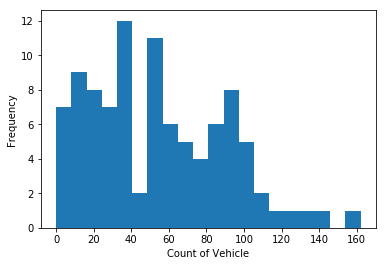

In [163]:
ax = df['Vehicle'].plot.hist(bins=20)
ax.set_xlabel('Count of Vehicle')

Text(0.5, 0, 'Count of Human')

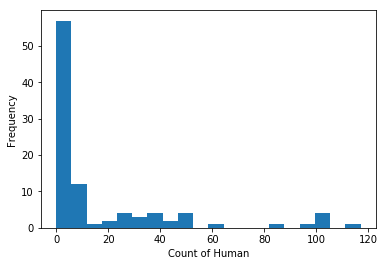

In [164]:
ax = df['Human'].plot.hist(bins=20)
ax.set_xlabel('Count of Human')

In [ ]:
plt.figure(figsize=(15, 15))
ax_cy= sns.displot(datam['Human'], kde=True)
ax_cy.set(xlabel='Number of Cyclists', title='Distribution of number of Cyclist per Image')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


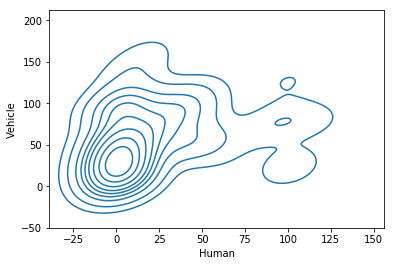

In [178]:
sns.kdeplot(df['Human'],df['Vehicle']);

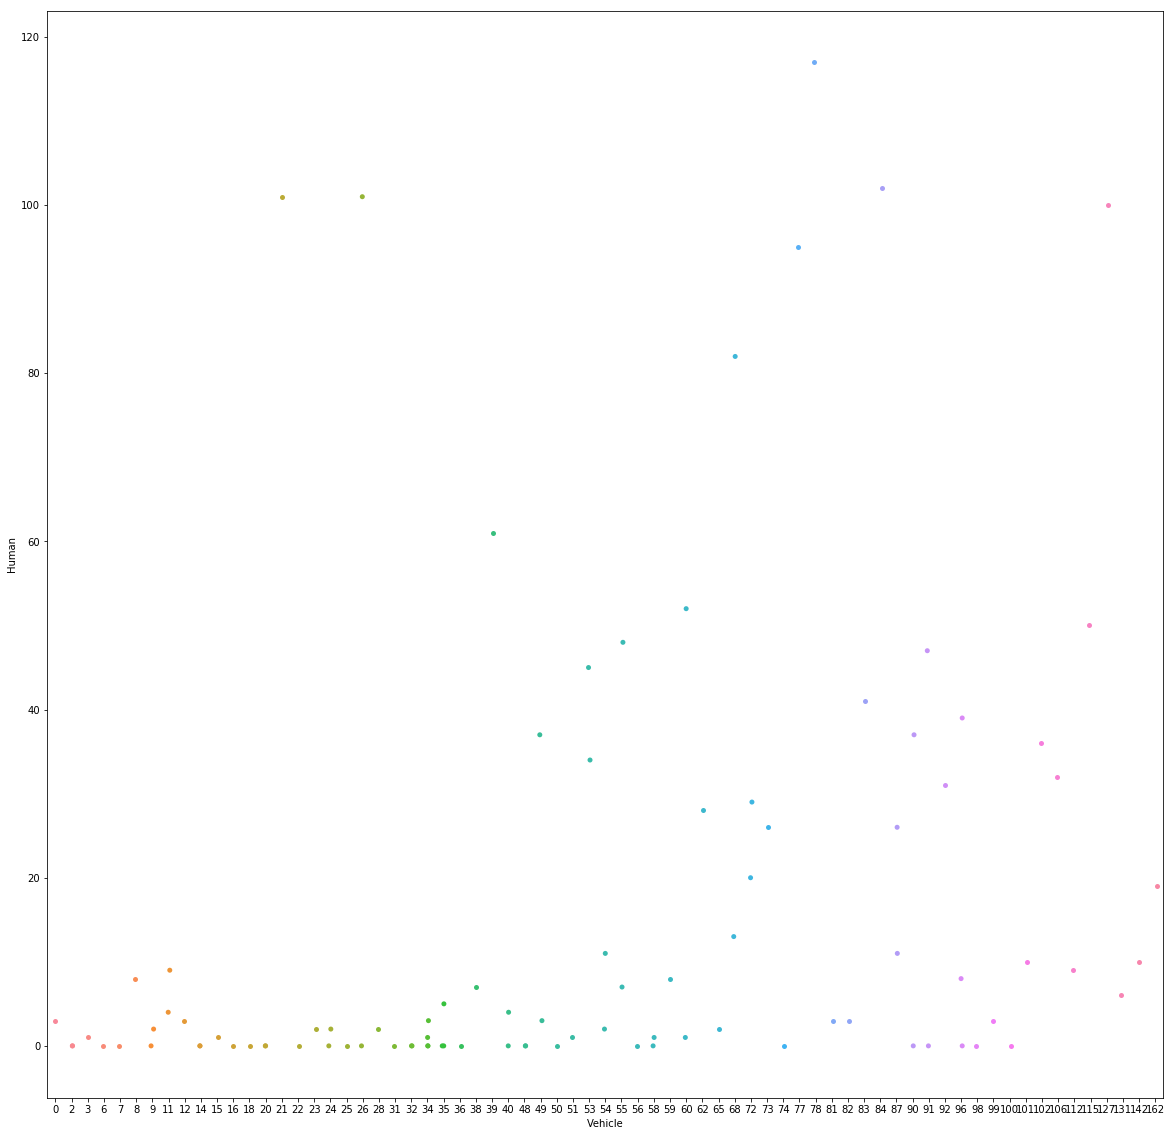

In [182]:
f, ax = plt.subplots(figsize=(20, 20))
sns.stripplot(x="Vehicle", y="Human", data=df)
plt.show()

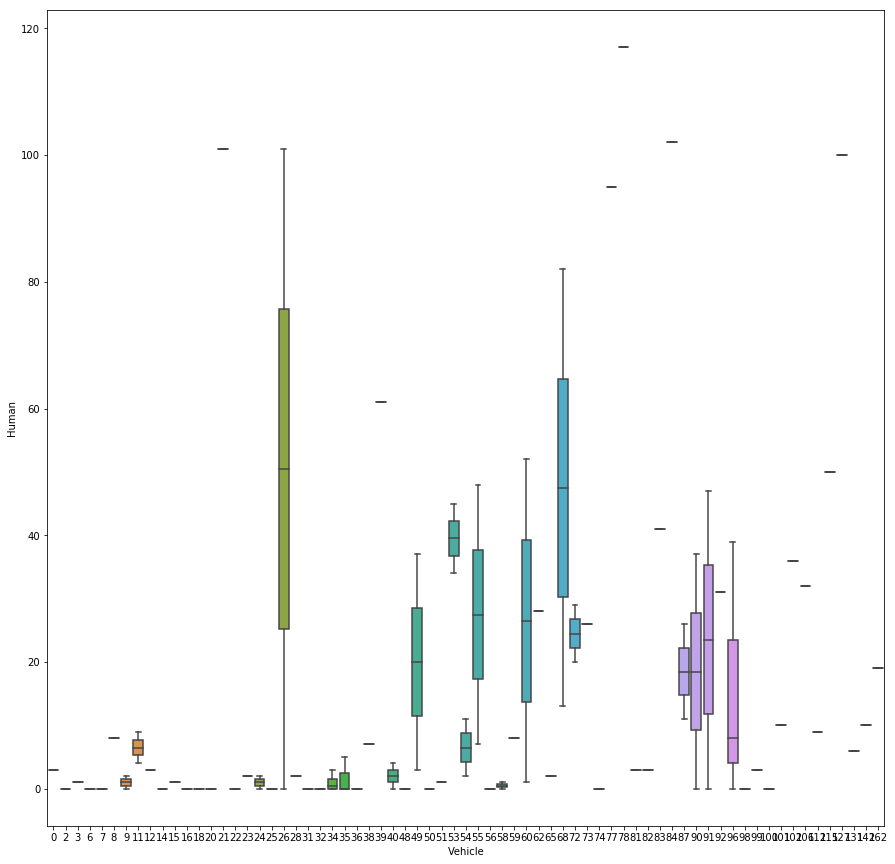

In [184]:
f, ax = plt.subplots(figsize=(15, 15))
sns.boxplot(x="Vehicle", y="Human", data=df)
plt.show()

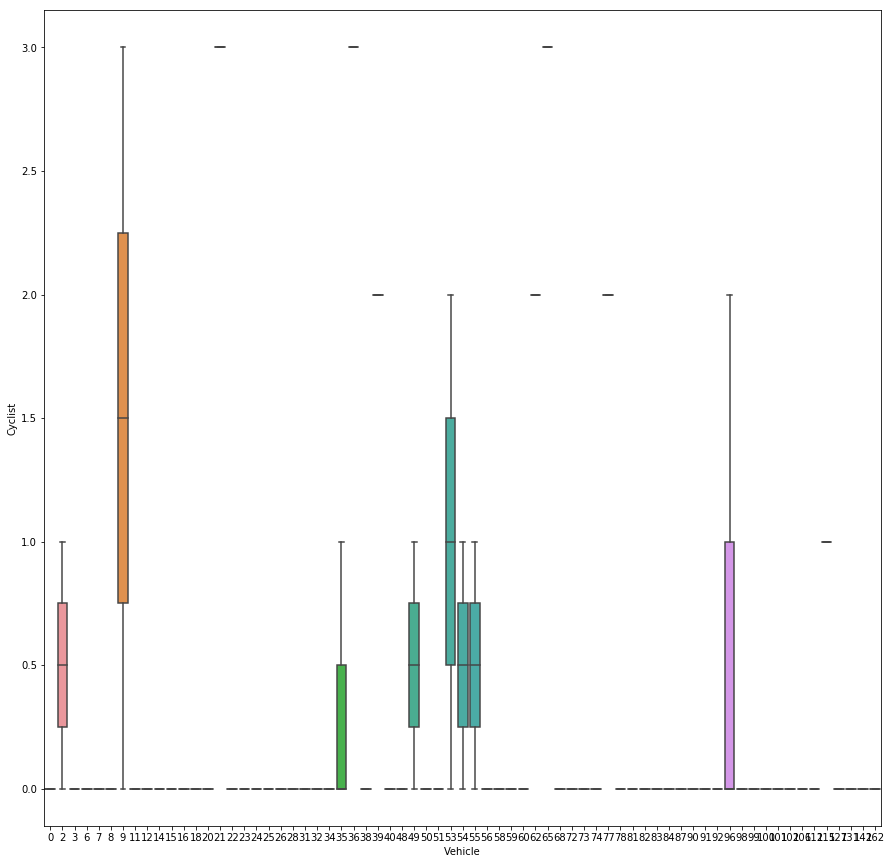

In [185]:
f, ax = plt.subplots(figsize=(15, 15))
sns.boxplot(x="Vehicle", y="Cyclist", data=df)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dime

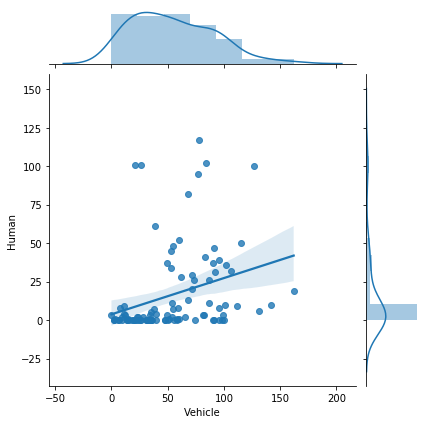

In [186]:
g = sns.JointGrid(x="Vehicle", y="Human", data=df)
g = g.plot(sns.regplot, sns.distplot)